# 1. Import the Libraries 

In [34]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf


# 2. Load the data

In [35]:
#Open the file as readonly
data1=h5py.File("D:\\D\\1. Great Lakes 18-19\\4. Deep Learning and NN\\Week4\\SVHN_single_grey1.h5",'r')

In [36]:
data1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [37]:
#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [38]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


#### Visualizing the dataset

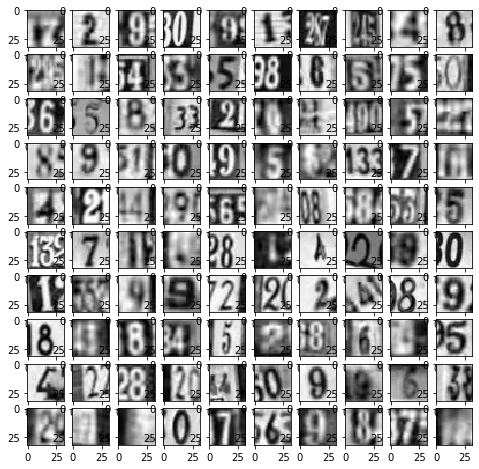

In [39]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

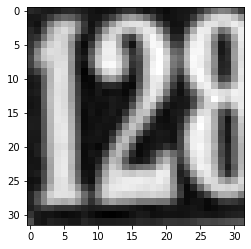

Label:  2


In [40]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

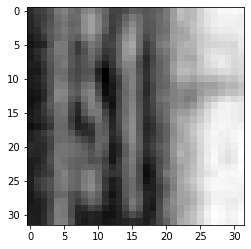

Label:  1


In [41]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

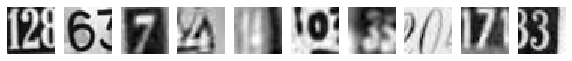

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [42]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# 3. Implementing an optimal K-Nearest Neighbour Classifier

In [199]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [8]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_val, y_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

k value=1, accuracy score=83.78%
k value=3, accuracy score=62.83%
k value=5, accuracy score=62.42%
k value=7, accuracy score=61.43%
k value=9, accuracy score=60.59%
k value=11, accuracy score=60.32%
k value=13, accuracy score=59.88%
k value=15, accuracy score=59.45%
k value=17, accuracy score=59.25%
k value=19, accuracy score=59.10%
k value=21, accuracy score=58.77%
k value=23, accuracy score=58.62%
k value=25, accuracy score=58.41%
k value=27, accuracy score=58.21%
k value=29, accuracy score=58.18%
k=1 value has highest accuracy of 83.78% on validation data


* It took more than 24hrs to find the k values and accuracy of the model using 4GB RAM and intel i5 processor. 

In [10]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=k_vals[i])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

 # 4. Printing Classification Metric Report

In [11]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
         

* The accuracy of the model is 46%.That is not good. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy.

#### Predicting the digits using KNN Classifier

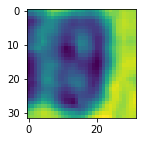

[9]


In [28]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32))
plt.show()
image = X_test[15]
print(knn.predict(image.reshape(1, -1)))

# 5. Implementing Deep Neural Network

In [43]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### Converting output label to multiple values

In [44]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [45]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [46]:
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [47]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## Implementing Neural Network 

In [304]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [305]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [293]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

#### Using sgd optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [247]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [248]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 137us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 5s 128us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 5s 130us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 5s 131us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 5s 126us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 5s 130us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 6s 1

#### Using adam optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [250]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [251]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 175us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
42000/42000 [==============================] - 7s 162us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
42000/42000 [==============================] - 7s 166us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
42000/42000 [==============================] - 7s 167us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
42000/42000 [==============================] - 7s 169us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
42000/42000 [==============================] - 7s 166us/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
42000/42000 [==============================] - 7s 1

* The accuracy of the model on val data is very low either using adam or sgd.

#### Now, try to change the learning rate in SGD optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [280]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 127us/step - loss: 9.5205 - accuracy: 0.1035 - val_loss: 2.3986 - val_accuracy: 0.1030
Epoch 2/100
42000/42000 [==============================] - 5s 126us/step - loss: 2.3534 - accuracy: 0.1020 - val_loss: 2.3296 - val_accuracy: 0.1015
Epoch 3/100
42000/42000 [==============================] - 5s 123us/step - loss: 2.3226 - accuracy: 0.1006 - val_loss: 2.3164 - val_accuracy: 0.1011
Epoch 4/100
42000/42000 [==============================] - 5s 120us/step - loss: 2.3139 - accuracy: 0.1007 - val_loss: 2.3110 - val_accuracy: 0.1012
Epoch 5/100
42000/42000 [==============================] - 5s 120us/step - loss: 2.3098 - accuracy: 0.1009 - val_loss: 2.3083 - val_accuracy: 0.1009
Epoch 6/100
42000/42000 [==============================] - 5s 122us/step - loss: 2.3075 - accuracy: 0.1009 - val_loss: 2.3066 - val_accuracy: 0.1010
Epoch 7/100
42000/42000 [==============================]

* The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

#### Now, let's try to change the learning rate in ADAM optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [306]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 180us/step - loss: 10.9612 - accuracy: 0.1337 - val_loss: 4.1578 - val_accuracy: 0.1754
Epoch 2/100
42000/42000 [==============================] - 7s 166us/step - loss: 3.0128 - accuracy: 0.1697 - val_loss: 2.3374 - val_accuracy: 0.1452
Epoch 3/100
42000/42000 [==============================] - 7s 167us/step - loss: 2.2645 - accuracy: 0.1620 - val_loss: 2.2029 - val_accuracy: 0.1779
Epoch 4/100
42000/42000 [==============================] - 7s 167us/step - loss: 2.1837 - accuracy: 0.1856 - val_loss: 2.1445 - val_accuracy: 0.1997
Epoch 5/100
42000/42000 [==============================] - 7s 169us/step - loss: 2.1190 - accuracy: 0.2090 - val_loss: 2.0763 - val_accuracy: 0.2268
Epoch 6/100
42000/42000 [==============================] - 7s 168us/step - loss: 2.0658 - accuracy: 0.2303 - val_loss: 2.0505 - val_accuracy: 0.2351
Epoch 7/100
42000/42000 [==============================

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [307]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 5s 87us/step
Val_acc using simple NN adam :  0.8263999819755554


In [308]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.8264


## Implementing batch normalization for training the neural network 

In [309]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

#### Adding Batch normalization layer 

In [310]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [311]:
keras_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

#### Using ADAM optimizer.
* learning rate= 0.0001


In [312]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [313]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 248us/step - loss: 2.1479 - accuracy: 0.2508 - val_loss: 1.9940 - val_accuracy: 0.3037
Epoch 2/100
42000/42000 [==============================] - 10s 228us/step - loss: 1.6269 - accuracy: 0.4861 - val_loss: 1.6468 - val_accuracy: 0.4754
Epoch 3/100
42000/42000 [==============================] - 9s 208us/step - loss: 1.3413 - accuracy: 0.6087 - val_loss: 1.4551 - val_accuracy: 0.5534
Epoch 4/100
42000/42000 [==============================] - 9s 216us/step - loss: 1.1435 - accuracy: 0.6808 - val_loss: 1.2232 - val_accuracy: 0.6539
Epoch 5/100
42000/42000 [==============================] - 9s 217us/step - loss: 0.9963 - accuracy: 0.7241 - val_loss: 1.1230 - val_accuracy: 0.6831
Epoch 6/100
42000/42000 [==============================] - 9s 210us/step - loss: 0.8880 - accuracy: 0.7514 - val_loss: 1.0722 - val_accuracy: 0.6806
Epoch 7/100
42000/42000 [=============================

In [314]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 6s 107us/step
Val_acc using Batch ANN adam :  0.8314666748046875


In [315]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.826400
2,NN_Batch_adam,0.831467


## Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [316]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

#### Adding Batch normalization layer  

In [317]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [318]:
keras_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

#### Using SGD optimizer
* learning rate =0.0001


In [319]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [320]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 250us/step - loss: 2.1492 - accuracy: 0.2520 - val_loss: 2.0291 - val_accuracy: 0.2933
Epoch 2/100
42000/42000 [==============================] - 9s 211us/step - loss: 1.6157 - accuracy: 0.5134 - val_loss: 1.6216 - val_accuracy: 0.5163
Epoch 3/100
42000/42000 [==============================] - 9s 214us/step - loss: 1.3135 - accuracy: 0.6361 - val_loss: 1.3621 - val_accuracy: 0.6015
Epoch 4/100
42000/42000 [==============================] - 9s 213us/step - loss: 1.1190 - accuracy: 0.6955 - val_loss: 1.2618 - val_accuracy: 0.6380
Epoch 5/100
42000/42000 [==============================] - 9s 218us/step - loss: 0.9821 - accuracy: 0.7283 - val_loss: 1.0875 - val_accuracy: 0.6824
Epoch 6/100
42000/42000 [==============================] - 9s 216us/step - loss: 0.8780 - accuracy: 0.7568 - val_loss: 1.0932 - val_accuracy: 0.6722
Epoch 7/100
42000/42000 [==============================

In [321]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 7s 114us/step
Val_acc using BatchNorm sgd :  0.8679500222206116


In [322]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.826400
2,NN_Batch_adam,0.831467
3,NN_Batch_sgd,0.867950


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

## Implementing batch normalization and Dropout for training the neural network 

In [352]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [353]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [339]:
keras_model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_31 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_32 (Activation)   (None, 256)              

#### Using ADAM optimizer.
* learning rate= 0.0001

In [340]:
#Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [341]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 264us/step - loss: 2.7309 - accuracy: 0.0985 - val_loss: 2.3234 - val_accuracy: 0.1142
Epoch 2/100
42000/42000 [==============================] - 10s 238us/step - loss: 2.6256 - accuracy: 0.1015 - val_loss: 2.3176 - val_accuracy: 0.1157
Epoch 3/100
42000/42000 [==============================] - 10s 238us/step - loss: 2.5558 - accuracy: 0.1025 - val_loss: 2.3059 - val_accuracy: 0.1110
Epoch 4/100
42000/42000 [==============================] - 10s 238us/step - loss: 2.4861 - accuracy: 0.1036 - val_loss: 2.3017 - val_accuracy: 0.1034
Epoch 5/100
42000/42000 [==============================] - 10s 240us/step - loss: 2.4489 - accuracy: 0.1036 - val_loss: 2.2963 - val_accuracy: 0.1119
Epoch 6/100
42000/42000 [==============================] - 10s 231us/step - loss: 2.4209 - accuracy: 0.1050 - val_loss: 2.2972 - val_accuracy: 0.1169
Epoch 7/100
42000/42000 [=========================

In [342]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 8s 127us/step
Val_acc using BatchNorm and Dropout adam :  0.7423833608627319


In [343]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.826400
2,NN_Batch_adam,0.831467
3,NN_Batch_sgd,0.867950
4,NN_Batch_Drop_adam,0.742383


## Testing NN on test data 

In [48]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [49]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [50]:
keras_model_final.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

In [51]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 182us/step - loss: 2.1438 - accuracy: 0.2544 - val_loss: 2.0569 - val_accuracy: 0.2821
Epoch 2/100
42000/42000 [==============================] - 6s 150us/step - loss: 1.5995 - accuracy: 0.5087 - val_loss: 1.6682 - val_accuracy: 0.4636
Epoch 3/100
42000/42000 [==============================] - 7s 177us/step - loss: 1.3022 - accuracy: 0.6312 - val_loss: 1.3960 - val_accuracy: 0.5786
Epoch 4/100
42000/42000 [==============================] - 8s 201us/step - loss: 1.1083 - accuracy: 0.6922 - val_loss: 1.2876 - val_accuracy: 0.6150
Epoch 5/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.9710 - accuracy: 0.7306 - val_loss: 1.1591 - val_accuracy: 0.6525
Epoch 6/100
42000/42000 [==============================] - 9s 208us/step - loss: 0.8685 - accuracy: 0.7535 - val_loss: 1.1056 - val_accuracy: 0.6734
Epoch 7/100
42000/42000 [==============================]

In [53]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

18000/18000 [==============================] - 2s 129us/step
Test accuracy :  0.7473888993263245


#### Predicting the digits using NN classifier on test data

#### Image 1

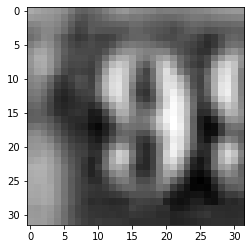

In [61]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [55]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[5]

9

#### Image 2

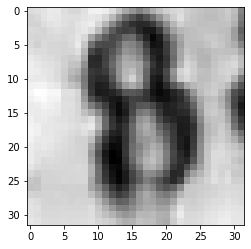

In [62]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [57]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[10]

0

#### Image 3

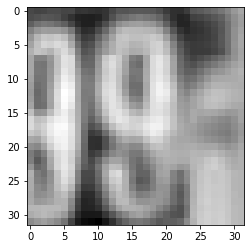

In [63]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [59]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[112]

9

In [60]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[6 7 2 ... 7 5 2]


# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* Using NN with batchNormalization we got 74.7% accuracy. We have predicted the classification of the images correctly.